# Synthesizer | Privacy and Accuracy

**Objective:**
- Demonstrate how Synthesizer maintains both privacy of data and accurate synthetic data distributions

**Observation:**
- As desired_conviction is increased, the accuracy of generated data increases. And while privacy decreases, it is maintained over reasonable ranges of conviction.

In [1]:
from pathlib import Path

from IPython.display import (
    display,
    Markdown,
)
import pandas as pd
import seaborn as sns
import os

from howso.synthesizer import Synthesizer
from howso.utilities import infer_feature_attributes
from howso.validator import Validator

os.environ["LANG"] = "en_US.UTF-8"
os.environ["LC_ALL"] = "en_US.UTF-8"


In [2]:
col_type_mapping = {
    'nih_age': 'Int64', 'nih_alcohol_frequency': 'Int64', 'nih_sex': 'Int64',
    'nih_asthma': 'Int64', 'nih_alc_sub_abuse': 'Int64', 'nih_autoimm': 'Int64',
    'nih_cancer_past_yr': 'Int64', 'nih_chronic_kidney_disease': 'Int64',
    'nih_chronic_lung': 'Int64', 'nih_copd': 'Int64', 'nih_cardiovascular_disease': 'Int64',
    'nih_depression': 'Int64', 'nih_diabetes': 'Int64', 'nih_hypertension': 'Int64',
    'nih_immunocompromised': 'Int64', 'nih_iv_drug_use': 'Int64',
    'nih_other_chronic_cond': 'Int64', 'nih_mental_health_disorder': 'Int64',
    'nih_sickle_cell_disease': 'Int64', 'cov_pan_chal_hlth_2': 'Int64',
    'cov_pan_chal_med_2': 'Int64', 'cov_pan_chlng_trans_2': 'Int64',
    'cov_tst_mthd_2': 'Int64', 'nih_abdom_pain': 'Int64', 'nih_cough': 'Int64',
    'nih_diff_breath': 'Int64', 'nih_fatigue': 'Int64', 'nih_fever_chills': 'Int64',
    'nih_headache': 'Int64', 'nih_muscle_ache': 'Int64',
    'nih_nausea_vomiting_diarrhea': 'Int64', 'nih_olfactory': 'Int64',
    'nih_other_symp': 'Int64', 'covid_pandemic_challenges_abod_2': 'Int64',
    'covid_pandemic_challenges_food_2': 'Int64', 'covid_pandemic_challenges_wate_2': 'Int64',
    'nih_throat_congestion_nose': 'Int64', 'nih_skin_rash': 'Int64',
    'covid_test_approval': 'Int64', 'covid_test_collection_setting': 'Int64',
    'covid_test_performed_location': 'Int64', 'covid_test_result': 'Int64',
    'covid_test_specimen_collector': 'Int64', 'covid_test_specimen_type': 'Int64',
    'covid_test_study_setting': 'Int64', 'covid_test_tar_dis_stat_2___1': 'Int64',
    'covid_test_tar_dis_stat_2___2': 'Int64', 'covid_test_tar_dis_stat_2___3': 'Int64',
    'covid_test_tar_dis_stat_2___4': 'Int64', 'covid_test_tar_dis_stat_2___5': 'Int64',
    'covid_test_tar_dis_stat_2___6': 'Int64', 'covid_test_tar_dis_stat_2___9': 'Int64',
    'covid_test_type': 'Int64', 'covid_vaccine': 'Int64', 'nih_employment': 'Int64',
    'nih_education': 'Int64', 'employed_ew': 'Int64', 'employed_healthcare_2': 'Int64',
    'family_income': 'Int64', 'flu_vaccine_season_3': 'Int64',
    'flu_vaccinehistind_2': 'Int64', 'gender_identity_term_2': 'Int64',
    'nih_insurance': 'Int64', 'hi_loss_covid': 'Int64', 'household_congregate_3': 'Int64',
    'household_famgen_3': 'Int64', 'household_homeless': 'Int64',
    'isolate_maintain_job': 'Int64', 'jobloss_covid19_2': 'Int64', 'language_english': 'Int64',
    'language_home___1': 'Int64', 'language_home___2': 'Int64', 'language_home___3': 'Int64',
    'language_home___4': 'Int64', 'language_home___5': 'Int64', 'language_home___6': 'Int64',
    'language_home___7': 'Int64', 'language_home___8': 'Int64', 'language_home___9': 'Int64',
    'language_home___90': 'Int64', 'language_home___99': 'Int64',
    'nih_lifetime_use_alcohol': 'Int64', 'positivemonth_covidtest_2': 'Int64',
    'positiveyear_covidtest_3': 'Int64', 'nih_pregnancy': 'Int64',
    'quarantine_maintain_job': 'Int64', 'race_ethn_asian_detail_3___1': 'Int64',
    'race_ethn_asian_detail_3___2': 'Int64', 'race_ethn_asian_detail_3___3': 'Int64',
    'race_ethn_asian_detail_3___4': 'Int64', 'race_ethn_asian_detail_3___5': 'Int64',
    'race_ethn_asian_detail_3___99': 'Int64', 'nih_ethnicity': 'Int64',
    'race_ethn_hispanic_detail_2___1': 'Int64', 'race_ethn_hispanic_detail_2___2': 'Int64',
    'race_ethn_hispanic_detail_2___3': 'Int64', 'race_ethn_hispanic_detail_2___4': 'Int64',
    'race_ethn_hispanic_detail_2___5': 'Int64', 'race_ethn_hispanic_detail_2___6': 'Int64',
    'race_ethn_hispanic_detail_2___7': 'Int64', 'race_ethn_hispanic_detail_2___99': 'Int64',
    'race_ethn_islander_detail_2___1': 'Int64', 'race_ethn_islander_detail_2___10': 'Int64',
    'race_ethn_islander_detail_2___11': 'Int64', 'race_ethn_islander_detail_2___12': 'Int64',
    'race_ethn_islander_detail_2___13': 'Int64', 'race_ethn_islander_detail_2___14': 'Int64',
    'race_ethn_islander_detail_2___2': 'Int64', 'race_ethn_islander_detail_2___3': 'Int64',
    'race_ethn_islander_detail_2___4': 'Int64', 'race_ethn_islander_detail_2___5': 'Int64',
    'race_ethn_islander_detail_2___6': 'Int64', 'race_ethn_islander_detail_2___7': 'Int64',
    'race_ethn_islander_detail_2___8': 'Int64', 'race_ethn_islander_detail_2___9': 'Int64',
    'race_ethn_islander_detail_2___99': 'Int64', 'recentmonth_covidtest_2': 'Int64',
    'recentresult_covidtest': 'Int64', 'recentyear_covidtest_3': 'Int64',
    'nih_disability': 'Int64', 'nih_health_status': 'Int64',
    'self_reported_weight_units_2': 'Int64', 'sex_orient_id': 'Int64',
    'nih_history_smoking': 'Int64', 'smoker_number': 'float64', 'test_accesseasy_2': 'Int64',
    'test_accesswhere_2': 'Int64', 'tested_for_covid': 'Int64',
    'tested_positive_for_covid': 'Int64', 'vaccine_avail': 'Int64',
    'vaccine_concerns_3___1': 'Int64', 'vaccine_concerns_3___10': 'Int64',
    'vaccine_concerns_3___2': 'Int64', 'vaccine_concerns_3___3': 'Int64',
    'vaccine_concerns_3___4': 'Int64', 'vaccine_concerns_3___5': 'Int64',
    'vaccine_concerns_3___6': 'Int64', 'vaccine_concerns_3___7': 'Int64',
    'vaccine_concerns_3___8': 'Int64', 'vaccine_concerns_3___9': 'Int64',
    'vaccine_concerns_3___96': 'Int64', 'vaccine_reasons_3___1': 'Int64',
    'vaccine_reasons_3___10': 'Int64', 'vaccine_reasons_3___11': 'Int64',
    'vaccine_reasons_3___2': 'Int64', 'vaccine_reasons_3___3': 'Int64',
    'vaccine_reasons_3___4': 'Int64', 'vaccine_reasons_3___5': 'Int64',
    'vaccine_reasons_3___6': 'Int64', 'vaccine_reasons_3___7': 'Int64',
    'vaccine_reasons_3___8': 'Int64', 'vaccine_reasons_3___9': 'Int64',
    'vaccine_reasons_3___96': 'Int64', 'nih_vape_freq': 'Int64', 'work_closecont_2': 'Int64',
    'work_ppe_2': 'Int64', 'work_wash_2': 'Int64', 'nih_zip': 'string', 'nih_weight': 'Int64',
    'nih_height': 'Int64', 'nih_race': 'Int64', 'nih_alcohol_yn': 'Int64',
    'nih_cig_smoke_freq': 'Int64', 'nih_smoking_yn': 'Int64'}
print(f'total number of columns being mapped: {len(col_type_mapping)}')

data_path = Path("/home", "sagemaker-user", "phs002660", "project14_DATA_transformcopy_v3_processed.csv")
df = pd.read_csv(data_path, dtype=col_type_mapping)
df = df.reset_index(drop=True)
print(df.columns)
print(f'total number of rows: {len(df)}')

# for model comparison for covid_test_result prediction, nulls from target feature should be removed and all-null columns should be removed as well
target_feature = 'covid_test_result'
df = df.dropna(subset=[target_feature])
df = df[df[target_feature] != 3]
print(f'after removing null and extraneous rows, df.shape: {df.shape}')
null_only_cols = df.columns[df.isna().all()].tolist()
print(null_only_cols)
df = df.drop(columns=null_only_cols)
df = df.reset_index(drop=True)
print(f'input dataframe shape after processing: {df.shape}')
pd.set_option('display.max_columns', None)
df.describe()

total number of columns being mapped: 164
Index(['nih_age', 'nih_alcohol_frequency', 'nih_sex', 'nih_asthma',
       'nih_alc_sub_abuse', 'nih_autoimm', 'nih_cancer_past_yr',
       'nih_chronic_kidney_disease', 'nih_chronic_lung', 'nih_copd',
       ...
       'work_closecont_2', 'work_ppe_2', 'work_wash_2', 'nih_zip',
       'nih_weight', 'nih_height', 'nih_race', 'nih_alcohol_yn',
       'nih_cig_smoke_freq', 'nih_smoking_yn'],
      dtype='object', length=164)
total number of rows: 5102
after removing null and extraneous rows, df.shape: (4582, 164)
['nih_alcohol_frequency', 'cov_tst_mthd_2', 'covid_pandemic_challenges_wate_2', 'employed_ew', 'family_income', 'nih_insurance', 'hi_loss_covid', 'household_congregate_3', 'nih_lifetime_use_alcohol', 'positivemonth_covidtest_2', 'positiveyear_covidtest_3', 'recentmonth_covidtest_2', 'recentresult_covidtest', 'recentyear_covidtest_3', 'nih_disability', 'nih_health_status', 'nih_history_smoking', 'smoker_number', 'test_accesseasy_2', 'test

,nih_age,nih_sex,nih_asthma,nih_alc_sub_abuse,nih_autoimm,nih_cancer_past_yr,nih_chronic_kidney_disease,nih_chronic_lung,nih_copd,nih_cardiovascular_disease,nih_depression,nih_diabetes,nih_hypertension,nih_immunocompromised,nih_iv_drug_use,nih_other_chronic_cond,nih_mental_health_disorder,nih_sickle_cell_disease,cov_pan_chal_hlth_2,cov_pan_chal_med_2,cov_pan_chlng_trans_2,nih_abdom_pain,nih_cough,nih_diff_breath,nih_fatigue,nih_fever_chills,nih_headache,nih_muscle_ache,nih_nausea_vomiting_diarrhea,nih_olfactory,nih_other_symp,covid_pandemic_challenges_abod_2,covid_pandemic_challenges_food_2,nih_throat_congestion_nose,nih_skin_rash,covid_test_approval,covid_test_collection_setting,covid_test_performed_location,covid_test_result,covid_test_specimen_collector,covid_test_specimen_type,covid_test_study_setting,covid_test_tar_dis_stat_2___1,covid_test_tar_dis_stat_2___2,covid_test_tar_dis_stat_2___3,covid_test_tar_dis_stat_2___4,covid_test_tar_dis_stat_2___5,covid_test_tar_dis_stat_2___6,covid_test_tar_dis_stat_2___9,covid_test_type,covid_vaccine,nih_employment,nih_education,employed_healthcare_2,flu_vaccine_season_3,flu_vaccinehistind_2,gender_identity_term_2,household_famgen_3,household_homeless,isolate_maintain_job,jobloss_covid19_2,language_english,language_home___1,language_home___2,language_home___3,language_home___4,language_home___5,language_home___6,language_home___7,language_home___8,language_home___9,language_home___90,language_home___99,nih_pregnancy,quarantine_maintain_job,race_ethn_asian_detail_3___1,race_ethn_asian_detail_3___2,race_ethn_asian_detail_3___3,race_ethn_asian_detail_3___4,race_ethn_asian_detail_3___5,race_ethn_asian_detail_3___99,nih_ethnicity,race_ethn_hispanic_detail_2___1,race_ethn_hispanic_detail_2___2,race_ethn_hispanic_detail_2___3,race_ethn_hispanic_detail_2___4,race_ethn_hispanic_detail_2___5,race_ethn_hispanic_detail_2___6,race_ethn_hispanic_detail_2___7,race_ethn_hispanic_detail_2___99,race_ethn_islander_detail_2___1,race_ethn_islander_detail_2___10,race_ethn_islander_detail_2___11,race_ethn_islander_detail_2___12,race_ethn_islander_detail_2___13,race_ethn_islander_detail_2___14,race_ethn_islander_detail_2___2,race_ethn_islander_detail_2___3,race_ethn_islander_detail_2___4,race_ethn_islander_detail_2___5,race_ethn_islander_detail_2___6,race_ethn_islander_detail_2___7,race_ethn_islander_detail_2___8,race_ethn_islander_detail_2___9,race_ethn_islander_detail_2___99,self_reported_weight_units_2,sex_orient_id,vaccine_avail,vaccine_concerns_3___1,vaccine_concerns_3___10,vaccine_concerns_3___2,vaccine_concerns_3___3,vaccine_concerns_3___4,vaccine_concerns_3___5,vaccine_concerns_3___6,vaccine_concerns_3___7,vaccine_concerns_3___8,vaccine_concerns_3___9,vaccine_concerns_3___96,vaccine_reasons_3___1,vaccine_reasons_3___10,vaccine_reasons_3___11,vaccine_reasons_3___2,vaccine_reasons_3___3,vaccine_reasons_3___4,vaccine_reasons_3___5,vaccine_reasons_3___6,vaccine_reasons_3___7,vaccine_reasons_3___8,vaccine_reasons_3___9,vaccine_reasons_3___96,nih_weight,nih_height,nih_race
count,4581.0,4518.0,71.0,71.0,71.0,71.0,71.0,1294.0,71.0,1294.0,71.0,1294.0,324.0,71.0,71.0,1294.0,71.0,71.0,79.0,79.0,79.0,649.0,1874.0,1873.0,1873.0,1875.0,652.0,1873.0,649.0,1873.0,1872.0,79.0,79.0,1875.0,649.0,3969.0,4011.0,4011.0,4582.0,4013.0,4011.0,4008.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,3969.0,214.0,147.0,227.0,42.0,27.0,117.0,142.0,168.0,3.0,155.0,117.0,2740.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,1482.0,4582.0,1482.0,556.0,102.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4581.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,429.0,282.0,78.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,4582.0,146.0,66.0,4581.0
mean,33.244925,0.585657,0.028169,0.0,0.0,0.0,0.0,0.001546,0.0,0.00541,

In [3]:
continuous_feats = ['nih_age', 'nih_weight', 'nih_height']

features = infer_feature_attributes(df, 
                                    infer_bounds=True,
                                    tight_bounds=continuous_feats + [target_feature],
                                    types={"continuous": continuous_feats}
                                    )

# As this is just a recipe notebook and not an attempt at creating anonymous data, we are setting the nominal features as `non_sensitive`.
# When creating anonymous data, you should only set nominal features as non_sensitive if they are truly non_sensitive.
# For example, when attempting to create anonymous data, we strongly recommend that nominals are encoded, which can be achieved by the following utility code:
subtype_map = {
    "nih_zip": "int-id"
}

for feature, subtype in subtype_map.items():
    features[feature]["type"] = "nominal"
    features[feature]["subtype"] = subtype

for f_name in features.get_names(types=("continuous")):
    if f_name not in continuous_feats:
        print(f'changing inferred continuous feature: {f_name} to nominal')
        features[f_name]["type"] = "nominal"

for f_name in features.get_names(types=("nominal", "ordinal")):
    if f_name not in subtype_map:
        features[f_name]["non_sensitive"] = True

features[target_feature]["bounds"] = {'allow_null': False}

features.to_dataframe()
print(features[target_feature])

changing inferred continuous feature: employed_healthcare_2 to nominal
changing inferred continuous feature: household_homeless to nominal
{'type': 'nominal', 'data_type': 'number', 'decimal_places': 0, 'original_type': {'data_type': 'integer', 'size': 8}, 'bounds': {'allow_null': False}, 'non_sensitive': True}


# Run Synthesizer for different Desired Convictions
- Run Synthesizer for convictions = [0.1, 0.5, 1, 3, 5, 10]

`Note:` For privacy preservation, privacy_override should be set to False and desired_conviction should be less than or equal to 5. Setting privacy_override=True and desired_conviction > 5 should only be considered for analytical / experimental use only.

`Note:` Setting desired_conviction > 10 will result in fewer outliers, putting emphasis on non-outliers and the synthesized data may be more extreme.


In [ ]:
with Synthesizer(privacy_override=True) as s:
    print(s.synthesize_cases.__doc__)

In [4]:
desired_conviction_list = [0.1, 0.5, 1, 3, 5, 10]
hyperparameters = None
synthed_dfs = []
with Synthesizer(privacy_override=True, use_id_privacy=False) as s:
    s.train(df, features=features)
    # hyperparameters = s.hyperparams
    hyperparams = s.cl.get_params(s.trainee.id)

    for desired_conviction in desired_conviction_list:
        # Train the given dataset
        gen_df = s.synthesize_cases(
            n_samples=df.shape[0],
            desired_conviction=desired_conviction,
            generate_new_cases='no'
        )
        synthed_dfs.append(gen_df)

Version 50.3.0 of Howso Engine™ is available. You are using version 50.2.1.


# Audit Results with Validator

In [5]:
gen_df

,nih_age,nih_sex,nih_asthma,nih_alc_sub_abuse,nih_autoimm,nih_cancer_past_yr,nih_chronic_kidney_disease,nih_chronic_lung,nih_copd,nih_cardiovascular_disease,nih_depression,nih_diabetes,nih_hypertension,nih_immunocompromised,nih_iv_drug_use,nih_other_chronic_cond,nih_mental_health_disorder,nih_sickle_cell_disease,cov_pan_chal_hlth_2,cov_pan_chal_med_2,cov_pan_chlng_trans_2,nih_abdom_pain,nih_cough,nih_diff_breath,nih_fatigue,nih_fever_chills,nih_headache,nih_muscle_ache,nih_nausea_vomiting_diarrhea,nih_olfactory,nih_other_symp,covid_pandemic_challenges_abod_2,covid_pandemic_challenges_food_2,nih_throat_congestion_nose,nih_skin_rash,covid_test_approval,covid_test_collection_setting,covid_test_performed_location,covid_test_result,covid_test_specimen_collector,covid_test_specimen_type,covid_test_study_setting,covid_test_tar_dis_stat_2___1,covid_test_tar_dis_stat_2___2,covid_test_tar_dis_stat_2___3,covid_test_tar_dis_stat_2___4,covid_test_tar_dis_stat_2___5,covid_test_tar_dis_stat_2___6,covid_test_tar_dis_stat_2___9,covid_test_type,covid_vaccine,nih_employment,nih_education,employed_healthcare_2,flu_vaccine_season_3,flu_vaccinehistind_2,gender_identity_term_2,household_famgen_3,household_homeless,isolate_maintain_job,jobloss_covid19_2,language_english,language_home___1,language_home___2,language_home___3,language_home___4,language_home___5,language_home___6,language_home___7,language_home___8,language_home___9,language_home___90,language_home___99,nih_pregnancy,quarantine_maintain_job,race_ethn_asian_detail_3___1,race_ethn_asian_detail_3___2,race_ethn_asian_detail_3___3,race_ethn_asian_detail_3___4,race_ethn_asian_detail_3___5,race_ethn_asian_detail_3___99,nih_ethnicity,race_ethn_hispanic_detail_2___1,race_ethn_hispanic_detail_2___2,race_ethn_hispanic_detail_2___3,race_ethn_hispanic_detail_2___4,race_ethn_hispanic_detail_2___5,race_ethn_hispanic_detail_2___6,race_ethn_hispanic_detail_2___7,race_ethn_hispanic_detail_2___99,race_ethn_islander_detail_2___1,race_ethn_islander_detail_2___10,race_ethn_islander_detail_2___11,race_ethn_islander_detail_2___12,race_ethn_islander_detail_2___13,race_ethn_islander_detail_2___14,race_ethn_islander_detail_2___2,race_ethn_islander_detail_2___3,race_ethn_islander_detail_2___4,race_ethn_islander_detail_2___5,race_ethn_islander_detail_2___6,race_ethn_islander_detail_2___7,race_ethn_islander_detail_2___8,race_ethn_islander_detail_2___9,race_ethn_islander_detail_2___99,self_reported_weight_units_2,sex_orient_id,vaccine_avail,vaccine_concerns_3___1,vaccine_concerns_3___10,vaccine_concerns_3___2,vaccine_concerns_3___3,vaccine_concerns_3___4,vaccine_concerns_3___5,vaccine_concerns_3___6,vaccine_concerns_3___7,vaccine_concerns_3___8,vaccine_concerns_3___9,vaccine_concerns_3___96,vaccine_reasons_3___1,vaccine_reasons_3___10,vaccine_reasons_3___11,vaccine_reasons_3___2,vaccine_reasons_3___3,vaccine_reasons_3___4,vaccine_reasons_3___5,vaccine_reasons_3___6,vaccine_reasons_3___7,vaccine_reasons_3___8,vaccine_reasons_3___9,vaccine_reasons_3___96,nih_zip,nih_weight,nih_height,nih_race
0,38,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,7,5,2,2,3,6,0,0,0,0,0,0,0,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,0,0,0,0,0,0,0,<NA>,0,<NA>,<NA>,<NA>,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3571203998761970690,<NA>,<NA>,97
1,17,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,7,5,2,2,3,6,0,0,0,0,0,0,0,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,1,0,0,<NA>,<NA>,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3571203998761970690,<NA>,<NA>,97
2,7,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

In [6]:
print(gen_df.shape)
print(gen_df[target_feature].value_counts())

(4582, 135)
covid_test_result
2    3670
1     912
Name: count, dtype: int64


In [7]:
desirabilities = []

for desired_conviction, synthed_df in zip(desired_conviction_list, synthed_dfs):
    synthed_df[target_feature] = synthed_df[target_feature].astype(int)
    display(Markdown(f"## `desired_conviction={desired_conviction}`"))
    with Validator(df, synthed_df, features=features, hyperparameters=hyperparams) as val:
        result = val.run_metrics(['AnonymityPreservation', 'DescriptiveStatistics'], action_features=[target_feature])
        desirabilities.append(result.overall_desirability)
    

## `desired_conviction=0.1`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=5.0
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=2.162
Run finished with overall_desirability=3.288


## `desired_conviction=0.5`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=5.0
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=1.954
Run finished with overall_desirability=3.126


## `desired_conviction=1`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=5.0
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=2.237
Run finished with overall_desirability=3.344


## `desired_conviction=3`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=4.019
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=3.826
Run finished with overall_desirability=3.921


## `desired_conviction=5`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=5.0
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=3.635
Run finished with overall_desirability=4.263


## `desired_conviction=10`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=4.569
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=3.707
Run finished with overall_desirability=4.115


In [8]:
# Convert the dictionary into DataFrame
final_result = pd.DataFrame()
final_result["Desired Conviction"] = desired_conviction_list
final_result["Desirability"] = desirabilities
display(final_result)

,Desired Conviction,Desirability
0,0.1,3.288
1,0.5,3.126
2,1.0,3.344
3,3.0,3.921
4,5.0,4.263
5,10.0,4.115


# Plot results

<Axes: xlabel='Desired Conviction', ylabel='Desirability'>

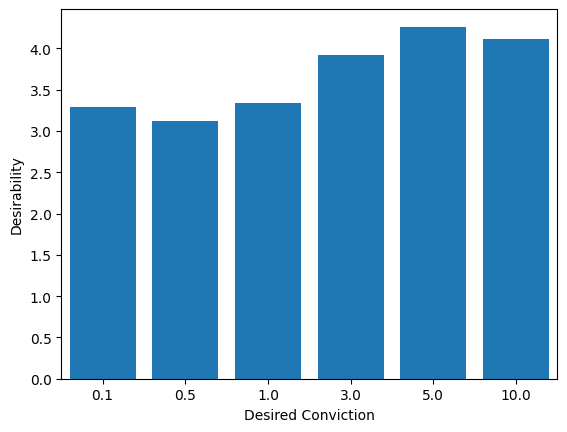

In [9]:
sns.barplot(data=final_result, x="Desired Conviction", y="Desirability", facecolor="tab:blue")

# Privacy Threshold

When `privacy_override` is not set to  <strong>True</strong>, the `new_case_threshold` can be adjusted to change the distance metric used for the privacy cutoff. This can have an effect on privacy, accuracy, and speed. The available metrics are:

- <strong>"min"</strong>: The minimum distance in the original local model space between any two cases. This provides the maximum accuracy while maintaining sufficient privacy.

- <strong>"max"</strong>: The maximum distance in the original local model space between any two cases. This method offers the maximum privacy. However, it comes at the cost of accuracy and sometimes performance.

- <strong>"most_similar"</strong>: The distance between the closest case in the local model space to it's closest case. This method provides privacy and accuracy results in between those of the minimum and maximum options described above, however it often has performance advantages for the level of privacy.


In [10]:
hyperparameters = None
desired_conviction = 5
with Synthesizer(privacy_override=True, use_id_privacy=False) as s:
    s.train(df, features=features)
    hyperparameters = s.hyperparams
    # Train the given dataset
    gen_df = s.synthesize_cases(n_samples=df.shape[0], 
                                desired_conviction=desired_conviction, 
                                generate_new_cases='no'
                               )
    gen_df.to_csv('synthesized_data_for_project14.csv', index=False)


nih_age Int64 0 90
nih_weight Int64 29 280
nih_height Int64 50 71


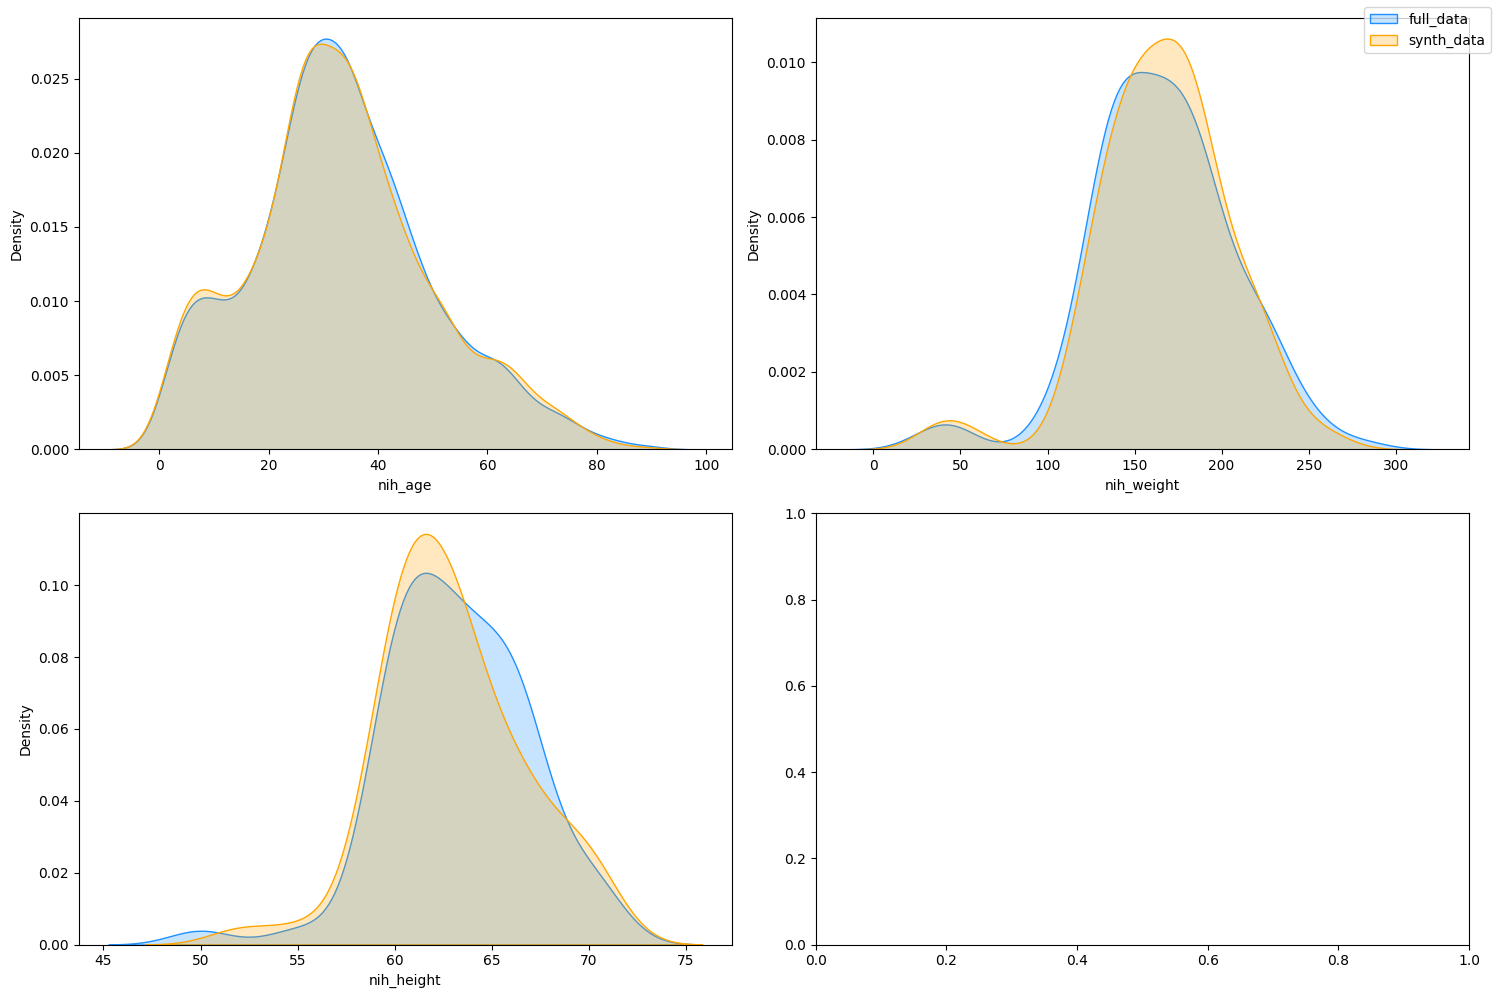

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
categorical_features = [f for f, a in features.items() if a["type"] in ("nominal", "ordinal")]

gen_df = pd.read_csv('synthesized_data_for_project14.csv', dtype=col_type_mapping)

for c, ax in zip(df.columns.drop(categorical_features), axes.flat):    
    print(c, df[c].dtypes, df[c].min(), df[c].max())
    if df[c].dtypes != 'string':
        sns.kdeplot(ax=ax, x=df[c], color="dodgerblue", label="full_data", fill=True)
        sns.kdeplot(ax=ax, x=gen_df[c], color="orange", label="full_data", fill=True)
        ax.set_xlabel(c)

fig.legend(labels=["full_data", "synth_data"])
fig.tight_layout()
plt.show()

In [12]:
hyperparameters = None
desired_conviction = 3

with Synthesizer(privacy_override=True, use_id_privacy=False) as s:
    s.train(df, features=features)
    hyperparameters = s.hyperparams
    # Train the given dataset
    gen_df = s.synthesize_cases(n_samples=df.shape[0], 
                                desired_conviction=desired_conviction, 
                                generate_new_cases='no'
                               )
    gen_df.to_csv('synthesized_data_for_project14_c3.csv', index=False)

In [ ]:
plt.clf()
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
categorical_features = [f for f, a in features.items() if a["type"] in ("nominal", "ordinal")]

gen_df = pd.read_csv('synthesized_data_for_project14_c3.csv', dtype=col_type_mapping)

for c, ax in zip(df.columns.drop(categorical_features), axes.flat):    
    print(c, df[c].dtypes, df[c].min(), df[c].max())
    if df[c].dtypes != 'string':
        sns.kdeplot(ax=ax, x=df[c], color="dodgerblue", label="full_data", fill=True)
        sns.kdeplot(ax=ax, x=gen_df[c], color="orange", label="full_data", fill=True)
        ax.set_xlabel(c)

fig.legend(labels=["full_data", "synth_data"])
fig.tight_layout()
plt.show()